# TP 2.1: Un peu de probabilités

## 1. Autour de la loi normale

La fonction `rnorm()` permet de générer des observations indépendantes d'une loi normale. Par défaut, la moyenne de cette loi est nulle et la variance vaut 1.

In [4]:
# Génère un vecteur de 10 observations
vecteur_gaussien_10 <- rnorm(10)
vecteur_gaussien_10

[1] -0.3155133739 -0.4898400427 -1.0853316398 -0.2590072882  0.4958296918
 [6]  1.1250067837 -1.2685726279 -0.1532020857 -1.3442933590  0.0009670954

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Représenter l'histogramme des valeurs contenues dans <code>vecteur_gaussien_10</code> grâce à la fonction <code>hist()</code> en limitant l'axe des abscisses à $[-3,3]$.</li>
        <li>Effectuer les mêmes opérations en générant cette fois 100 observations dans un objet <code>vecteur_gaussien_100</code>. Commenter.</li>
        <li>Dans une matrice de taille $200 \times 10$, générer des observations d'une loi normale centrée réduite.</li>
        <li>Calculer les 200 moyennes des 200 échantillons donnés par les lignes de la matrice précédente. Stocker les résultats dans un objet <code>vecteur_moyen_10</code> et représenter l'histogramme de ces 200 moyennes en utilisant la même échelle que précédemment pour l'axe des abscisses.</li>
        <li>Calculer la moyenne et la variance des valeurs du vecteur <code>vecteur_moyen_10</code>. Ces résultats sont-ils cohérents avec les valeurs théoriques ?</li>
        <li>Effectuer les mêmes opérations avec des échantillons de 100 observations dans une matrice $200 \times 100$.</li>
    </ol>
</div>

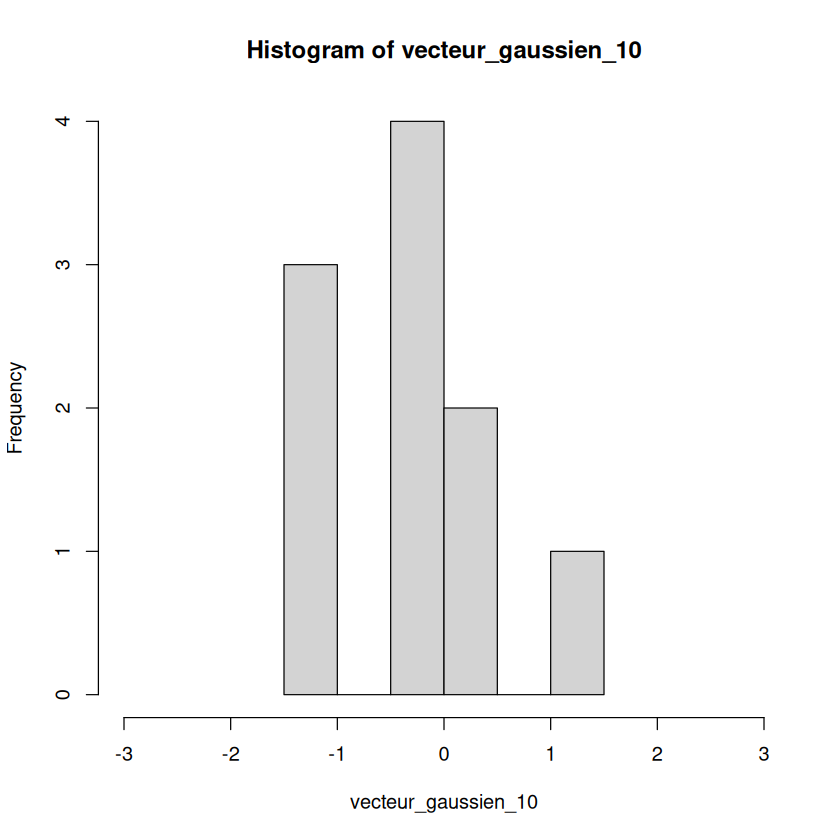

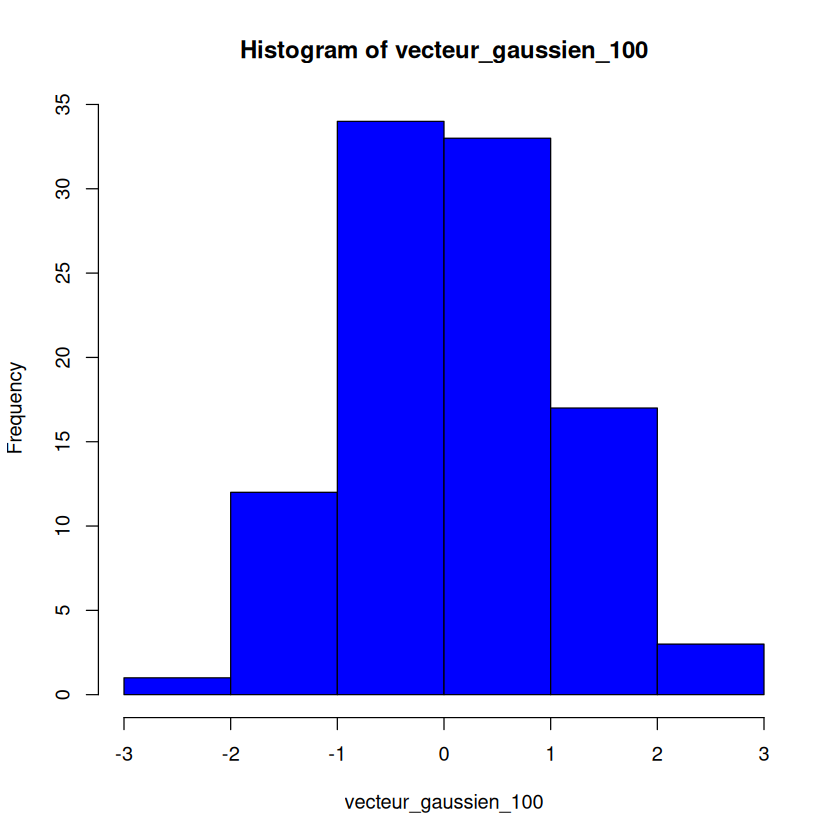

Variance n=10: 0.09009133 
Moyenne n=10: 0.02231504 


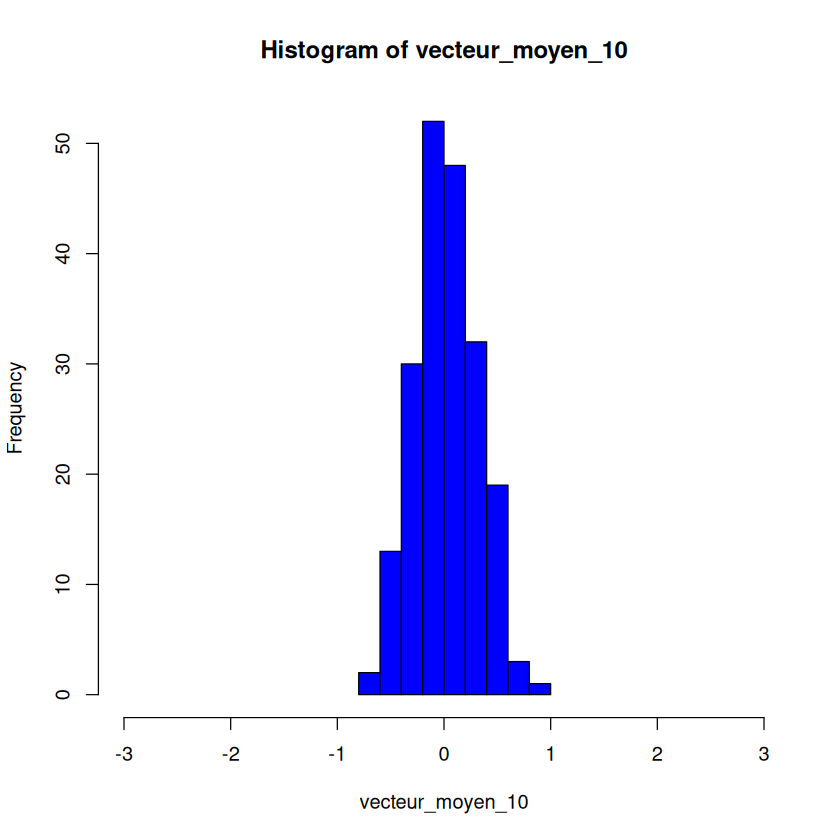

Variance n=100: 0.01138467 
Moyenne n=100: 0.007277443 


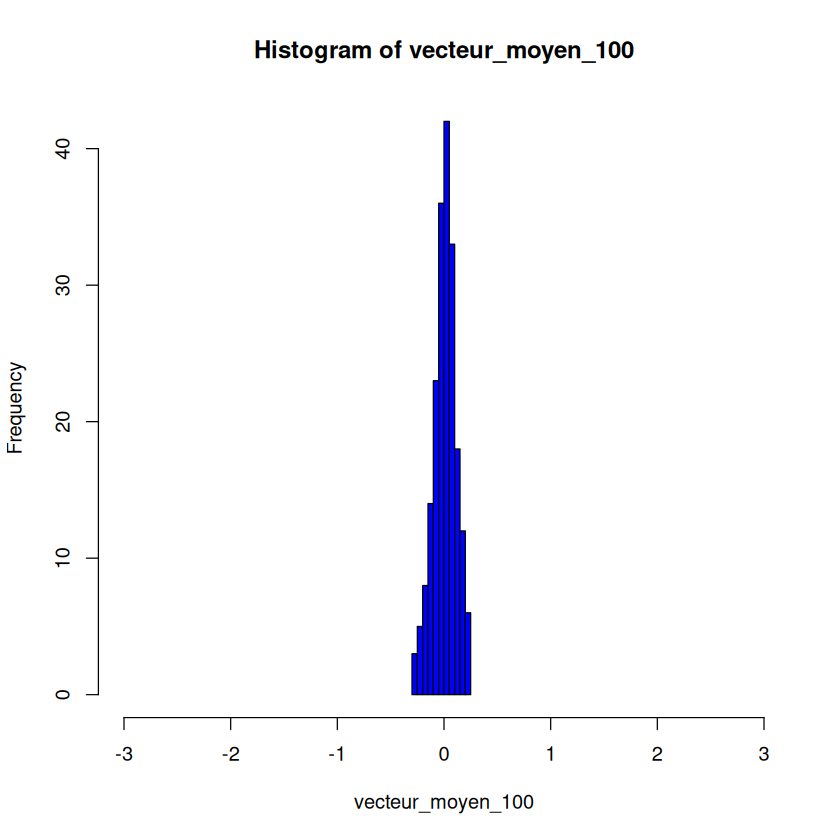

In [24]:
# À FAIRE

# 1
par(bg="white")
hist(vecteur_gaussien_10, xlim= c(-3,3))

# 2
vecteur_gaussien_100 <- rnorm(100)
par(bg="white")
hist(vecteur_gaussien_100, xlim= c(-3,3), col="blue")

# 3
matrice_200_10 <- matrix(rnorm(200*10), nrow=200)

# 4
vecteur_moyen_10 <- apply(matrice_200_10, 1, mean)
par(bg="white")
hist(vecteur_moyen_10, xlim= c(-3,3), col="blue")

# 5
cat("Variance n=10:", var(vecteur_moyen_10), "\n")
cat("Moyenne n=10:", mean(vecteur_moyen_10), "\n")

# 6
matrice_200_100 <- matrix(rnorm(200*100), nrow=200)
vecteur_moyen_100 <- apply(matrice_200_100, 1, mean)
par(bg="white")
hist(vecteur_moyen_100, xlim= c(-3,3), col="blue")
cat("Variance n=100:", var(vecteur_moyen_100), "\n")
cat("Moyenne n=100:", mean(vecteur_moyen_100), "\n")


## 2. Vers la loi du $\chi^2$

Comme dans l'exercice précédent, nous générons 200 échantillons de 10 observations générées selon un loi normale centrée réduite.

In [25]:
matrice_200_10 <- matrix(rnorm(200*10), nrow=200)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>À partir de la matrice <code>matrice_200_10</code>, calculer le vecteur <code>vecteur_carre_10</code> de longueur 200 contenant la somme des carrés des valeurs de chacun des 200 échantillons de taille 10.</li>
        <li>Représenter l'histogramme de ces valeurs.</li>
        <li>Superposer la densité d'une loi de $\chi^2$ (fonction <code>dchisq()</code>)à 10 degrés de liberté.<br>
            <center><img src="img/chi2.png"></center></li>
    </ol>
</div>

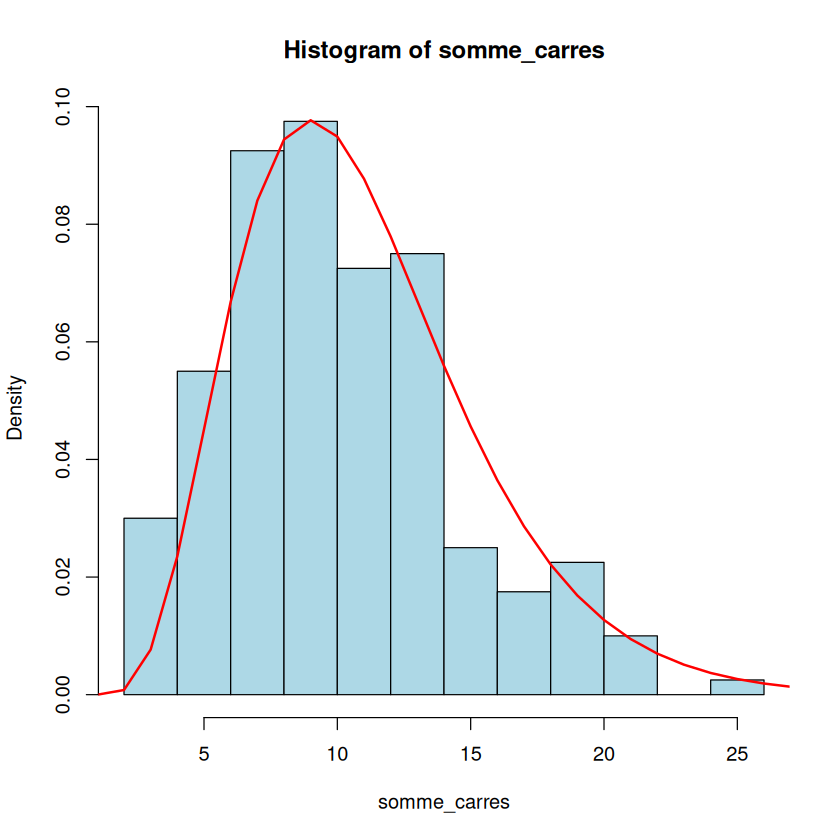

In [50]:
# À FAIRE
square_sum <- function(x) {
    sum <- 0
    for (i in 1:length(x)) {
        sum <- sum + x[i]*x[i]
    }
    return(sum)
}
somme_carres <-apply(matrice_200_10, 1, square_sum)

par(bg = "white")
dens <- dchisq(seq(from = 0, to = 30, by = 1), df = 10)
hist(somme_carres, col="lightblue",breaks = 15, freq = FALSE)
lines(dens, col = "red", lwd = 2)




## 3. Vers la loi de Fisher

Nous générons cette fois deux matrices remplies d'observations indépendantes de loi normale centrée réduite et de tailles respectives $200 \times 5$ et $200 \times 10$.

In [51]:
matrice_200_5 <- matrix(rnorm(200*5), nrow=200)
matrice_200_10 <- matrix(rnorm(200*10), nrow=200)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Comme dans l'exercice précédent, calculer les vecteurs <code>vecteur_carre_5</code> et <code>vecteur_carre_10</code> de longueur 200 contenant la somme des carrés des valeurs de chaque ligne des deux matrices.</li>
        <li>Calculer le vecteur <code>vecteur_rapport_5_10</code> obtenu par le rapport de <code>vecteur_carre_5</code> sur <code>vecteur_carre_10</code>.</li>
        <li>Représenter l'histogramme des 200 valeurs du vecteur <code>vecteur_rapport_5_10</code>.</li>
        <li>Superposer la densité d'une loi de Fisher (fonction <code>df()</code>)à 5 et 10 degrés de liberté.</li>
    </ol>
</div>

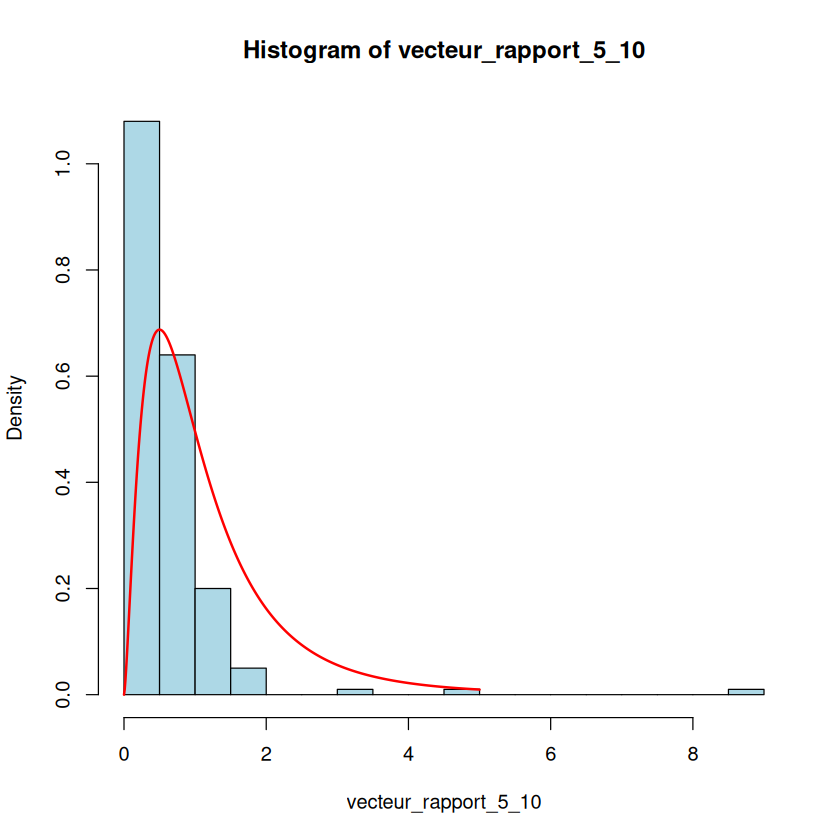

In [70]:
# À FAIRE
matrice_200_5 <- matrix(rnorm(200*5), nrow=200)
matrice_200_10 <- matrix(rnorm(200*10), nrow=200)


vecteur_carres_5 <- apply(matrice_200_5, 1, square_sum)
vecteur_carres_10 <- apply(matrice_200_10, 1, square_sum)

vecteur_rapport_5_10 <- vecteur_carres_5 / vecteur_carres_10   

par(bg="white")
hist(vecteur_rapport_5_10, col="lightblue", breaks=20, freq=FALSE)  
x <- seq(0, 5, by=0.01)
lines(x, df(x, df1=5, df2=10), col="red", lwd=2)